In [143]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [144]:
# Load the data and fit a decision tree classifier
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

feature_names = iris.feature_names
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
class_names = iris.target_names

In [145]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

print("n_nodes", n_nodes)
print("children_left", children_left)
print("children_right", children_right)
print("feature", feature)
print("threshold", threshold)
print(feature_names)
print(class_names)

n_nodes 13
children_left [ 1 -1  3  4 -1  6 -1 -1  9 10 -1 -1 -1]
children_right [ 2 -1  8  5 -1  7 -1 -1 12 11 -1 -1 -1]
feature [ 3 -2  2  3 -2  1 -2 -2  3  3 -2 -2 -2]
threshold [ 0.80000001 -2.          4.95000005  1.65000004 -2.          3.10000002
 -2.         -2.          1.75        1.65000004 -2.         -2.
 -2.        ]
['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
['setosa' 'versicolor' 'virginica']


In [146]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth
    
    # If the left and right child of a node is not the same we have a split  node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has {n} nodes and has "
      "the following tree structure:\n".format(n=n_nodes))
for i in range(n_nodes):
    if is_leaves[i]:
        print("{space}node={node} is a leaf node.".format(
            space=node_depth[i] * "\t", node=i))
    else:
        print("{space}node={node} is a split node: "
              "go to node {left} if X[:, {feature}] <= {threshold} "
              "else to node {right}.".format(
                  space=node_depth[i] * "\t",
                  node=i,
                  left=children_left[i],
                  feature=feature[i],
                  threshold=threshold[i],
                  right=children_right[i]))


The binary tree structure has 13 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node.
	node=2 is a split node: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 8.
		node=3 is a split node: go to node 4 if X[:, 3] <= 1.6500000357627869 else to node 5.
			node=4 is a leaf node.
			node=5 is a split node: go to node 6 if X[:, 1] <= 3.100000023841858 else to node 7.
				node=6 is a leaf node.
				node=7 is a leaf node.
		node=8 is a split node: go to node 9 if X[:, 3] <= 1.75 else to node 12.
			node=9 is a split node: go to node 10 if X[:, 3] <= 1.6500000357627869 else to node 11.
				node=10 is a leaf node.
				node=11 is a leaf node.
			node=12 is a leaf node.


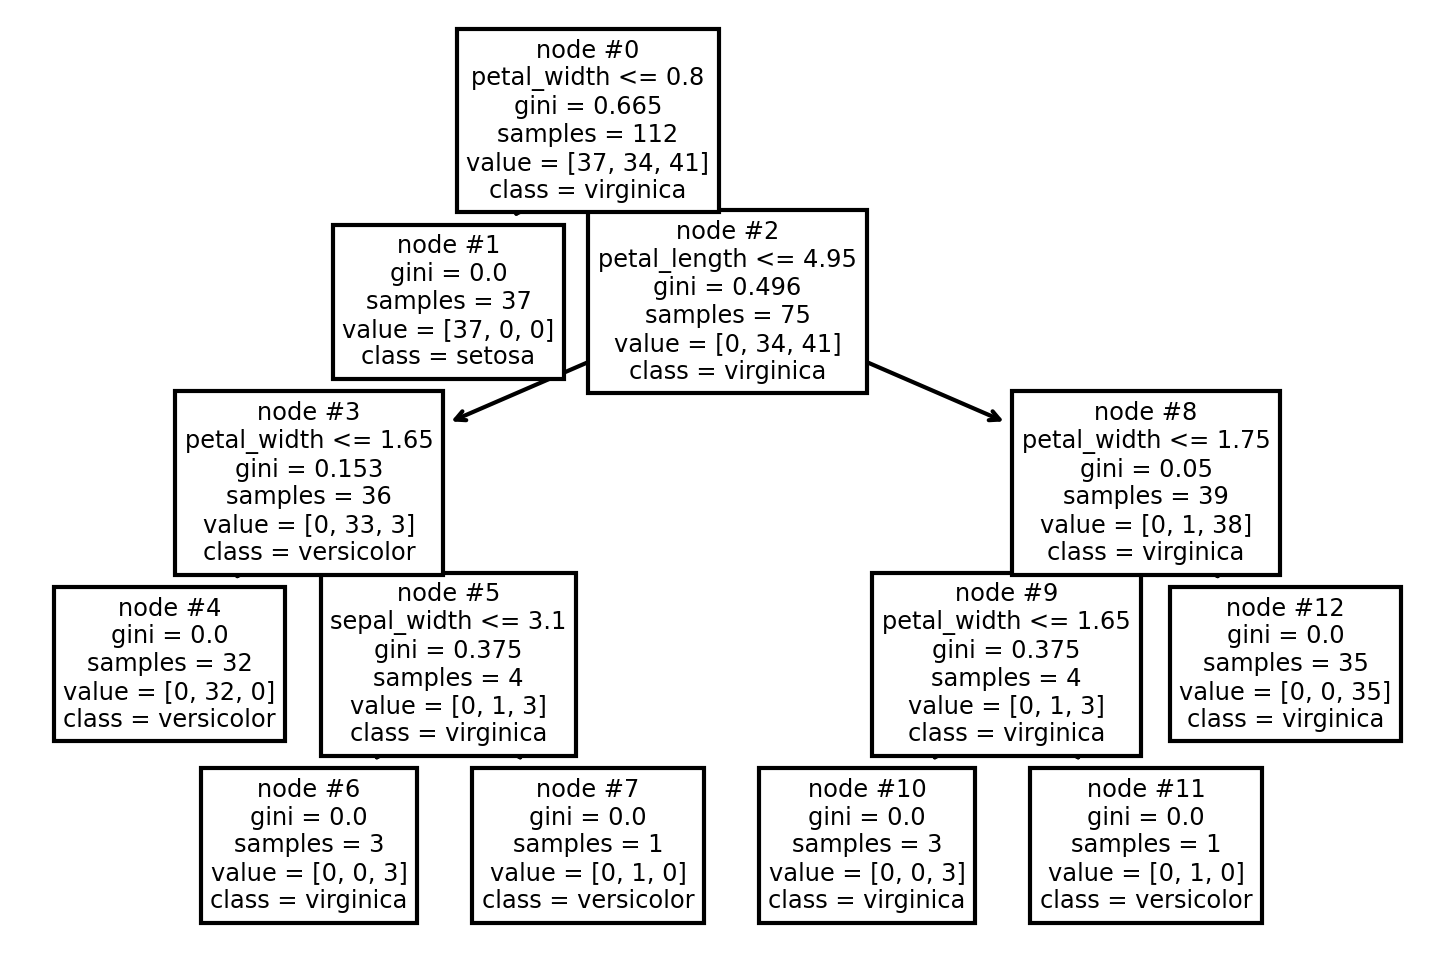

In [147]:
fig = plt.figure()
fig.set_dpi(300)
tree.plot_tree(decision_tree=clf, class_names=class_names, feature_names=feature_names, node_ids=True)
fig.savefig("tree.png")
plt.show()

In [155]:
def get_paths():
    all_paths = []
    in_order_path()

def in_order_path(t, all_paths, node_id=0, path=[], path_string=""):
    # process current node
    if feature[node_id] >= 0: # if its a split node, get the attribute and value
        fname = feature_names[t.tree_.feature[node_id]]
        fvalue = t.tree_.threshold[node_id]
        path_component = "{fname} <= {fvalue:0.2f}, ".format(fname=fname, fvalue=fvalue)
    else: # otherwise its a leaf node, determine the class
        cid = np.argmax(t.tree_.value[node_id])
        cname = class_names[cid]
        path_component = "leaf: " + cname
    path_string = path_string + path_component
    path = path.copy()
    path.append(node_id)

    if(t.tree_.children_left[node_id] == -1 and t.tree_.children_right[node_id] == -1):
        print(path)
        print(path_string)
        all_paths.append((path))
        return

    # process left child
    in_order_path(t, all_paths, t.tree_.children_left[node_id], path, path_string) 

    # process right node
    in_order_path(t, all_paths, t.tree_.children_right[node_id], path, path_string)

In [156]:
all_paths = []
in_order_path(t=clf, all_paths=all_paths)

[0, 1]
petal_width <= 0.80, leaf: setosa
[0, 2, 3, 4]
petal_width <= 0.80, petal_length <= 4.95, petal_width <= 1.65, leaf: versicolor
[0, 2, 3, 5, 6]
petal_width <= 0.80, petal_length <= 4.95, petal_width <= 1.65, sepal_width <= 3.10, leaf: virginica
[0, 2, 3, 5, 7]
petal_width <= 0.80, petal_length <= 4.95, petal_width <= 1.65, sepal_width <= 3.10, leaf: versicolor
[0, 2, 8, 9, 10]
petal_width <= 0.80, petal_length <= 4.95, petal_width <= 1.75, petal_width <= 1.65, leaf: virginica
[0, 2, 8, 9, 11]
petal_width <= 0.80, petal_length <= 4.95, petal_width <= 1.75, petal_width <= 1.65, leaf: versicolor
[0, 2, 8, 12]
petal_width <= 0.80, petal_length <= 4.95, petal_width <= 1.75, leaf: virginica


In [157]:
all_paths

[[0, 1],
 [0, 2, 3, 4],
 [0, 2, 3, 5, 6],
 [0, 2, 3, 5, 7],
 [0, 2, 8, 9, 10],
 [0, 2, 8, 9, 11],
 [0, 2, 8, 12]]

In [ ]:
np.array()